<a href="https://colab.research.google.com/github/JiteshNayak2004/ML_LAB/blob/main/ML_LAB_JITESH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Experiment 1

 Aim: To learn how to import standard sklearn libraries and to get familiar
with the iris and digits standard datasets

In [ ]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
dir(iris)
print(iris.DESCR)

digits = datasets.load_digits()
dir(digits)
print(digits.DESCR)

## Experiment 2

 Aim: To learn to split the dataset for training, validation and testing using the sklearn.model_selection.train_test_split() function.



In [ ]:
from sklearn.model_selection import train_test_split

df = pd.DataFrame(iris.data, columns=iris.feature_names)

df_train, df_temp = train_test_split(df, test_size=0.2)
df_val, df_test = train_test_split(df_temp, test_size=0.5)

print("Train set shape (IRIS):", len(df_train))
print("Validation set shape (IRIS):", len(df_val))
print("Test set shape (IRIS):",len(df_test))

df1 = pd.DataFrame(digits.data, columns=digits.feature_names)

df_train1, df_temp1 = train_test_split(df1, test_size=0.2)
df_val1, df_test1 = train_test_split(df_temp1, test_size=0.5)

print("Train set shape (DIGITS):", len(df_train1))
print("Validation set shape (DIGITS):", len(df_val1))
print("Test set shape (DIGITS):",len(df_test1))



## Experiment 3
Visualization of a dataset using matplotlib and seaborn

Aim: To learn to understand the data better by visualizing attributes


In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
iris=datasets.load_iris()
dir(iris)
print(iris.DESCR)
df=pd.DataFrame(iris.data, columns=iris.feature_names)
#labels are assigned to df[target] table or array
df['target']=pd.Series(iris.target)
print (df.head(10))
plt.plot (df["sepal width (cm)"], df["sepal length (cm)"], "r--")
df.plot(kind ="scatter",x ="sepal length (cm)",y ="petal length (cm)")
plt.grid()
df = sns.load_dataset('iris')
print (df.head(10))
sns.set_style("whitegrid")
sns.FacetGrid(df, hue ="species",height = 6).map(plt.scatter,"sepal_length","petal_length").add_legend()
plt.show()
sns.boxplot(df,x="species",y="petal_length")
plt.show()

## Experiment 4
Experiment 4 : Confusion matrix, AUC-ROC curve and other performance metrics.

 Aim: To learnt out model evaluation functions in sklearn.



In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics
n = 100
ratio = .95
n_0 = int((1-ratio) * n)
n_1 = int(ratio * n)
y = np.array([0] * n_0 + [1] * n_1)
print (y)

y_proba_2 = np.array(np.random.uniform(0, .7,n_0).tolist() +
np.random.uniform(.3, 1, n_1).tolist())
y_pred_2 = y_proba_2 > .75
print (y_proba_2)
print (y_pred_2)
print(f'accuracy score: {accuracy_score(y, y_pred_2)}')
cf_mat = confusion_matrix(y, y_pred_2)
print('Confusion matrix')
print(cf_mat)
print (f'model 2 AUC score: {roc_auc_score(y, y_proba_2)}')
fpr, tpr,__ = metrics.roc_curve(y, y_proba_2)
# #create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Program- 5
 Program to learn Linear Regression using Gradient Descent method

 Linear Regression with Gradient Descent


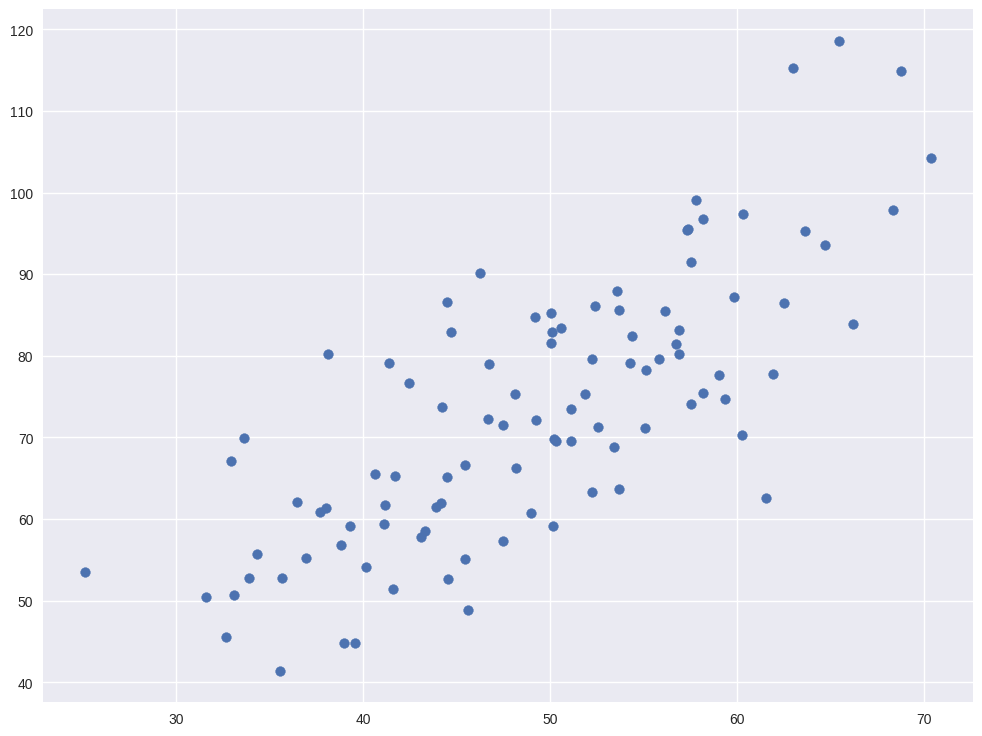

M =  1.4796491688881985
C =  0.10148121497503645


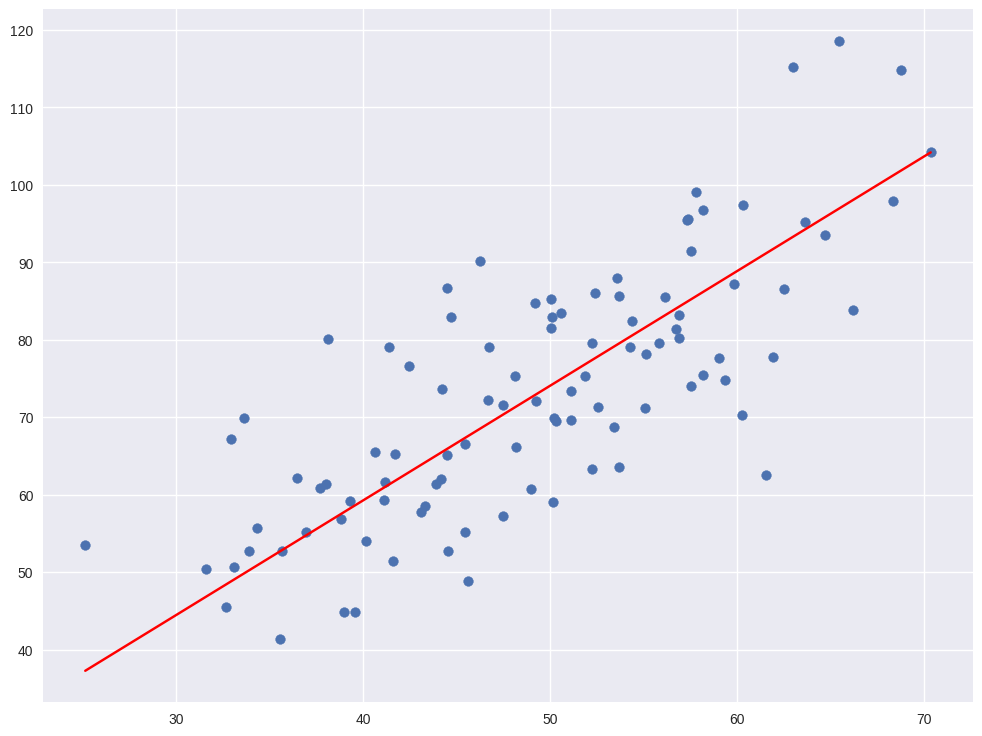

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)
# Preprocessing Input data
data = pd.read_csv('data.csv')
X=data.iloc[:, 0]
Y=data.iloc[:, 1]

plt.scatter(X, Y)
plt.show()
# Building the model
m = 0
c = 0
L = 0.0001 # The learning Rate
epochs = 1000 # The number of iterations to perform gradient descent
n =float(len(X)) # Number of elements in X

for i in range(epochs):
  Y_pred = m*X + c #The current predicted value of Y
  D_m=(-2/n) * sum(X * (Y- Y_pred)) # Derivative wrt m
  D_c = (-2/n) * sum(Y- Y_pred) # Derivative wrt c
  m = m - L*D_m #Update m
  c = c - L*D_c #Update c

print("M = ",m)
print("C = ", c)
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')
plt.show()

## PROGRAM – 6
Program to Learn bias-variance trade-off

Estimate the bias and variance for a regression model

Exhibiting low bias, high variance model and high bias, low variance
model


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
X = np.linspace(-3, 3, 100)
y = np.sin(X) + np.random.normal(0, 0.2, 100)  # Adding noise
X = X[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_train_linear = linear_model.predict(X_train)
y_pred_test_linear = linear_model.predict(X_test)

poly_model = make_pipeline(PolynomialFeatures(degree=15), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_train_poly = poly_model.predict(X_train)
y_pred_test_poly = poly_model.predict(X_test)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, label='Training data', color='blue', alpha=0.6)
plt.scatter(X_test, y_test, label='Test data', color='green', alpha=0.6)
plt.plot(X, linear_model.predict(X), color='red', label='Linear Model')
plt.title('High Bias / Low Variance Model')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, label='Training data', color='blue', alpha=0.6)
plt.scatter(X_test, y_test, label='Test data', color='green', alpha=0.6)
plt.plot(np.linspace(-3, 3, 100), poly_model.predict(np.linspace(-3, 3, 100)[:,
np.newaxis]), color='red', label='Polynomial Model')
plt.title('Low Bias / High Variance Model')
plt.legend()
plt.show()

mse_train_linear = mean_squared_error(y_train, y_pred_train_linear)
mse_test_linear = mean_squared_error(y_test, y_pred_test_linear)
mse_train_poly = mean_squared_error(y_train, y_pred_train_poly)
mse_test_poly = mean_squared_error(y_test, y_pred_test_poly)

print("Linear Regression Model (High Bias/Low Variance)")
print(f"Training MSE: {mse_train_linear}")
print(f"Testing MSE: {mse_test_linear}\n")
print("Polynomial Regression Model (Low Bias/High Variance)")
print(f"Training MSE: {mse_train_poly}")
print(f"Testing MSE: {mse_test_poly}\n")


from mlxtend.evaluate import bias_variance_decomp

mse, bias, var = bias_variance_decomp(linear_model, X_train, y_train, X_test, y_test,
loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

## PROGRAM–7a
Program to implement a decision tree and display it

In [ ]:
from sklearn import datasets
import pandas as pd
from sklearn.tree import export_text


iris=datasets.load_iris()

# df will fold dataset as a table
df=pd.DataFrame(iris.data, columns=iris.feature_names)
#labels are assigned to df[target] table or array
df['target']=pd.Series(iris.target)

from sklearn.model_selection import train_test_split
# Train Test Split Ratio
df_train,df_test=train_test_split(df,test_size=0.3)

df['target_names']=df['target'].apply(lambda y:iris.target_names[y])

print('Number of Training samples')
print(df_train.shape[0])
print('Number of Testing samples')
print(df_test.shape[0],"\n")

#Importing Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier()
x_train=df_train[iris.feature_names]
x_test=df_test[iris.feature_names]

y_train=df_train['target']
y_test=df_test['target']

clf.fit(x_train,y_train)

print(export_text(clf, feature_names=iris.feature_names, spacing=3, decimals=1))

Number of Training samples
105
Number of Testing samples
45 

|--- petal width (cm) <= 0.8
|   |--- class: 0
|--- petal width (cm) >  0.8
|   |--- petal width (cm) <= 1.8
|   |   |--- petal length (cm) <= 5.0
|   |   |   |--- petal width (cm) <= 1.7
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.7
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  5.0
|   |   |   |--- petal width (cm) <= 1.6
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.6
|   |   |   |   |--- sepal length (cm) <= 6.9
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.9
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.8
|   |   |--- class: 2



## PROGRAM–7b
 Program to calculate accuracy of decision tree

In [ ]:
from sklearn import datasets
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris=datasets.load_iris()
df=pd.DataFrame( iris.data, columns=iris.feature_names )
df['target']=pd.Series( iris.target )
df_train,df_test=train_test_split(df,test_size=0.3)
df['target_names']=df['target'].apply(lambda y:iris.target_names[y])

print('Number of Training samples')
print(df_train.shape[0])
print('Number of Testing samples')
print(df_test.shape[0])

clf=DecisionTreeClassifier()
x_train=df_train[iris.feature_names]
x_test=df_test[iris.feature_names]
y_train=df_train['target']
y_test=df_test['target']

clf.fit(x_train,y_train)

y_test_pred=clf.predict(x_test)
print('Class of Testing Samples')
print(y_test_pred)

x=accuracy_score(y_test,y_test_pred)
print('Accuracy')
print(x)

Number of Training samples
105
Number of Testing samples
45
Class of Testing Samples
[1 1 0 1 0 2 1 1 0 0 2 2 1 1 1 2 0 1 2 0 0 0 2 0 0 1 1 2 0 1 0 0 1 1 2 2 0
 2 2 0 1 0 1 1 2]
Accuracy
0.9333333333333333


## PROGRAM–7c
Program to implement a Decision Tree Regression


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

n=200

height_pop1_f=np.random.normal(loc=155,scale=10,size=n)
height_pop1_m=np.random.normal(loc=175,scale=5,size=n)
height_pop2_f=np.random.normal(loc=165,scale=10,size=n)
height_pop2_m=np.random.normal(loc=185,scale=5,size=n)
height_f=np.concatenate([height_pop1_f,height_pop2_f])
height_m=np.concatenate([height_pop1_m,height_pop2_m])

df_height=pd.DataFrame( { 'Gender':[1 for i in range(height_f.size)]+ [2 for i in range(height_m.size)],'Height':np.concatenate((height_f,height_m))} )
df_height.groupby('Gender')[['Height']].agg([np.mean,np.median]).round(1)
df_train,df_test=train_test_split(df_height,test_size=0.3)
x_train,x_test=df_train[['Gender']],df_test[['Gender']]
y_train,y_test=df_train['Height'],df_test['Height']

print('Training Samples')
print(df_train)
print('Testing Samples')
print(df_test)

for criterion in['squared_error','absolute_error']:
  rgrsr=DecisionTreeRegressor(criterion=criterion)
  rgrsr.fit(x_train,y_train)
  print(f'criterion={criterion}:\n')
  print(export_text(rgrsr,feature_names=['Gender'],spacing=3,decimals=1))

## PROGRAM–8 a and b

 8(a) To design K-Nearest Neighbour Classifier.

 8(b) Change the number of neighbors and observe the change.

<ipython-input-9-5b8ba8b51e76>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


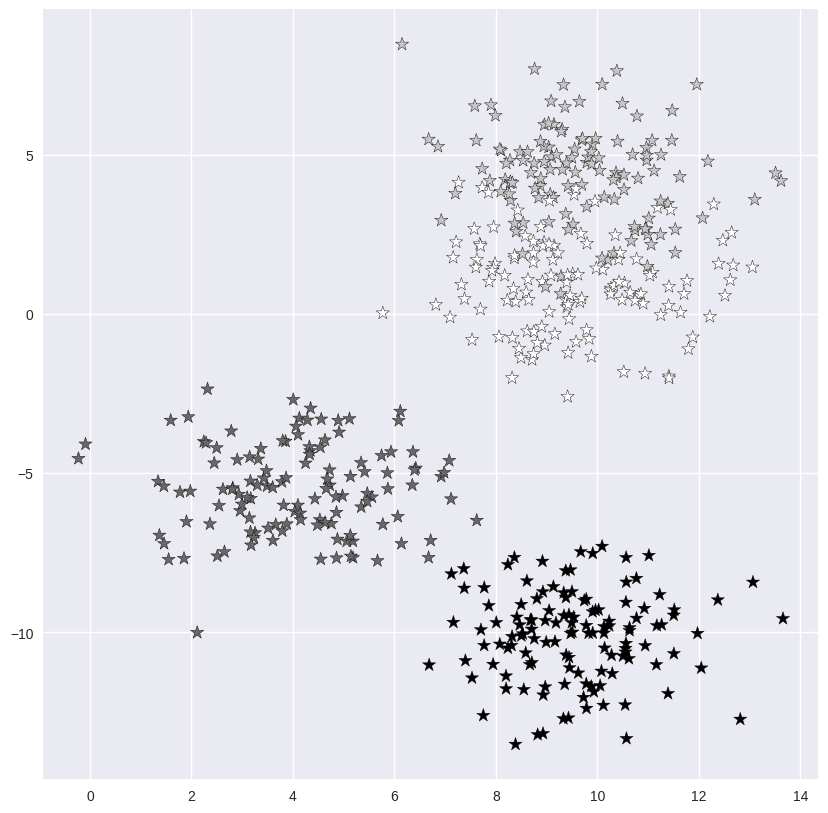

Accuracy with k=5 93.60000000000001
Accuracy with k=1 90.4


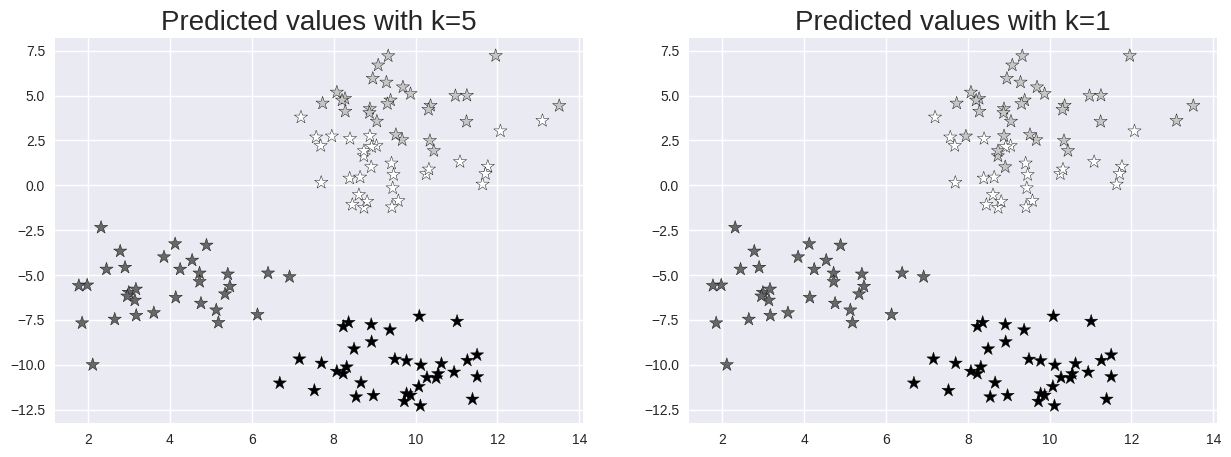

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y =make_blobs(n_samples = 500, n_features = 2, centers = 4, cluster_std = 1.5, random_state = 4)
plt.style.use('seaborn')
plt.figure(figsize = (10,10))
plt.scatter(X[:,0], X[:,1], c=y, marker= '*', s=100, edgecolors='black')
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker= '*', s=100, edgecolors='black')
plt.title("Predicted values with k=5", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_1, marker= '*', s=100, edgecolors='black')
plt.title("Predicted values with k=1", fontsize=20)
plt.show()

## Experiment 10 a

To find K means clustering for a dataset

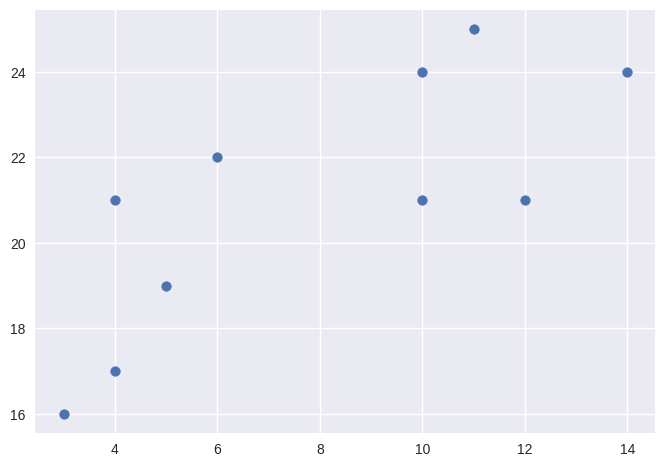

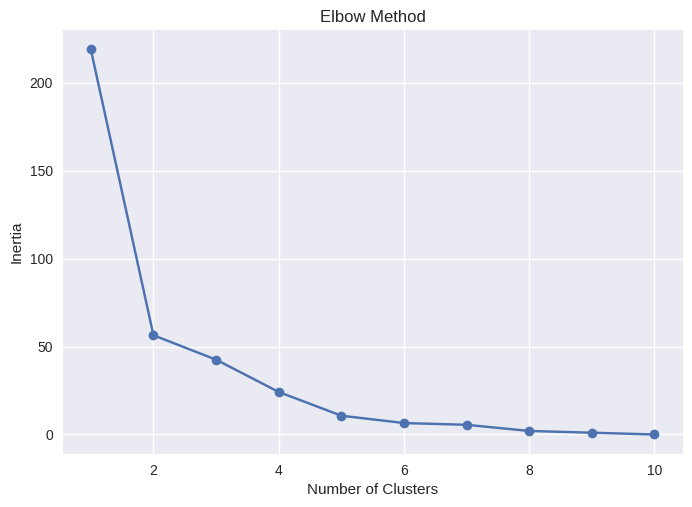

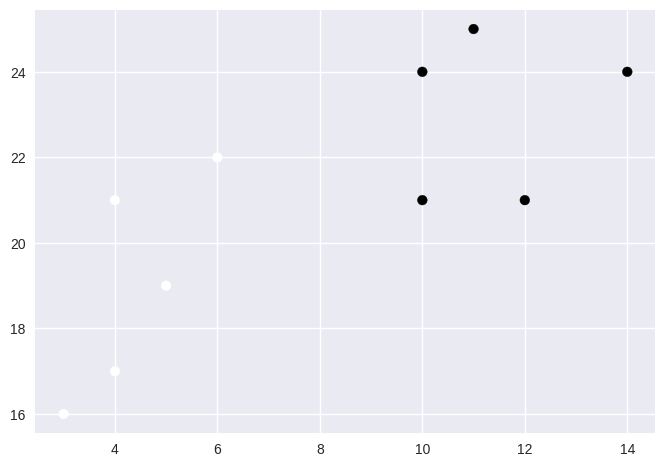

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

x = [4, 5, 10, 4, 3, 11, 14, 6, 10, 12 ]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x,y)
plt.show()

data = list(zip(x,y))
inertias = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, n_init ='auto')
  kmeans.fit(data)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker ='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

kmeans = KMeans(n_clusters = 2, n_init ='auto')
kmeans.fit(data)

plt.scatter(x , y, c=kmeans.labels_)
plt.show()

## Experiment 10 b

To perform PCA on a dataset

Saving wine.csv to wine.csv


<ipython-input-8-2072ae88c9be>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label=j)


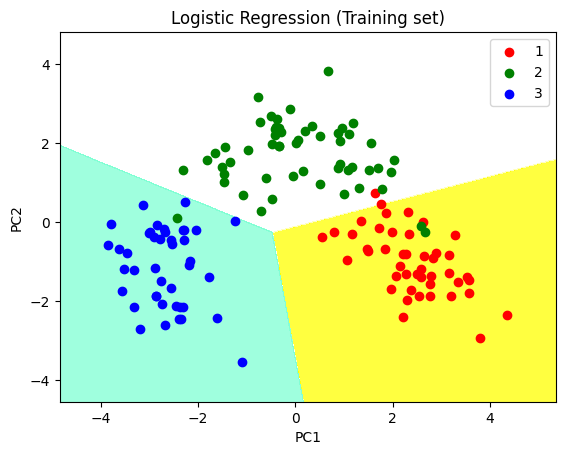

<ipython-input-8-2072ae88c9be>:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label=j)


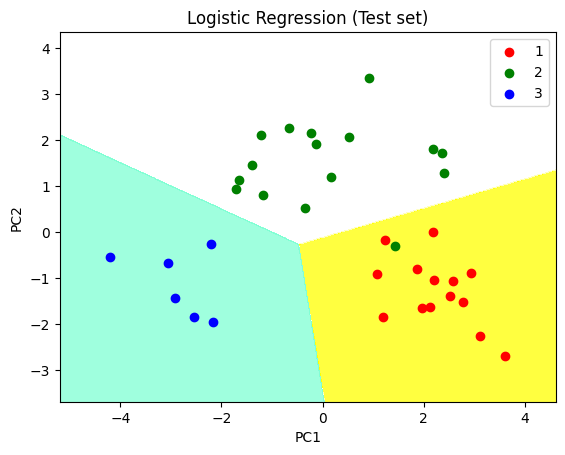

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

uploaded = files.upload()

dataset = pd.read_csv('wine.csv')

X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01), np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('yellow', 'white', 'aquamarine')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01), np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label=j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()